In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("data/macrodata.csv",index_col=0, parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


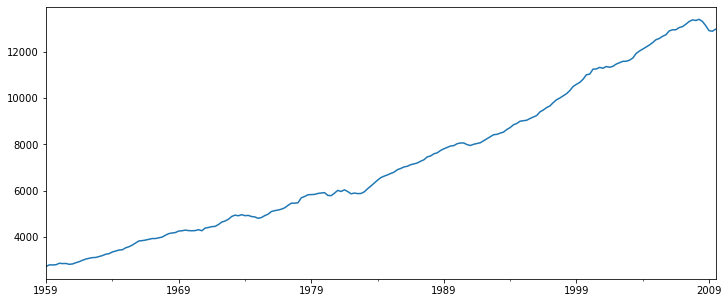

In [5]:
df['realgdp'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [8]:
type(gdp_trend)

pandas.core.series.Series

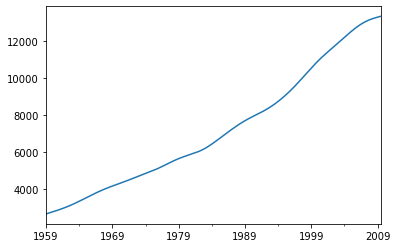

In [9]:
gdp_trend.plot()

In [10]:
df['trend'] = gdp_trend

In [11]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


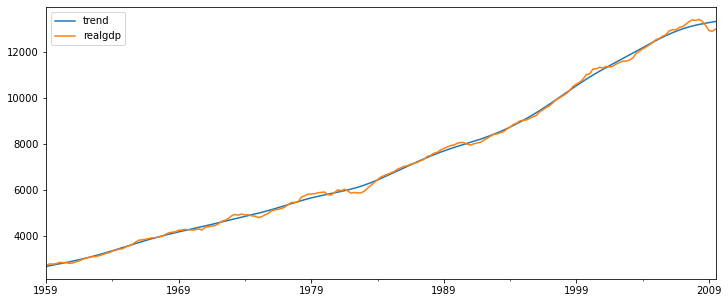

In [13]:
df[['trend','realgdp']].plot(figsize=(12,5))

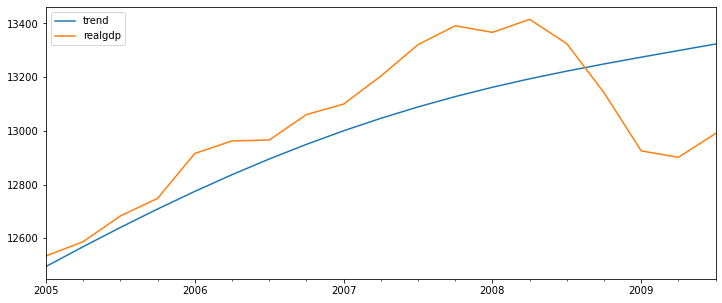

In [15]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [18]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [19]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [20]:
airline = airline.dropna()

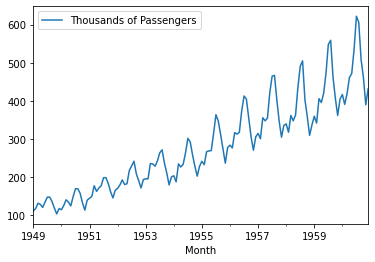

In [21]:
airline.plot()

In [22]:
from statsmodels.tsa.seasonal import  seasonal_decompose

In [38]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [39]:
result

In [40]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [41]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [42]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

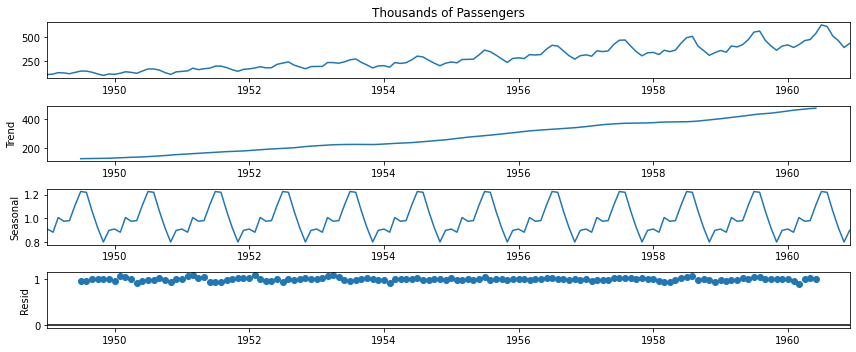

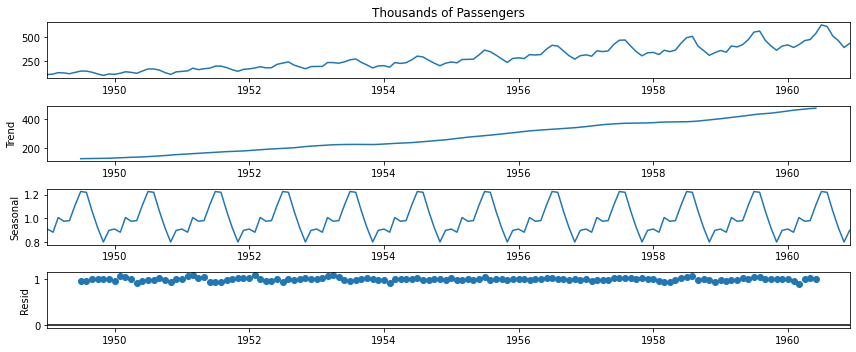

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot()

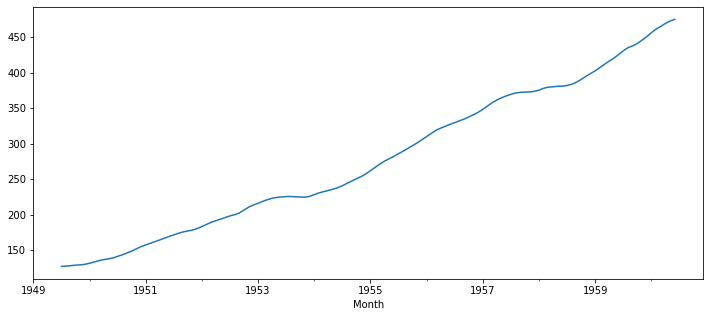

In [45]:
result.trend.plot()

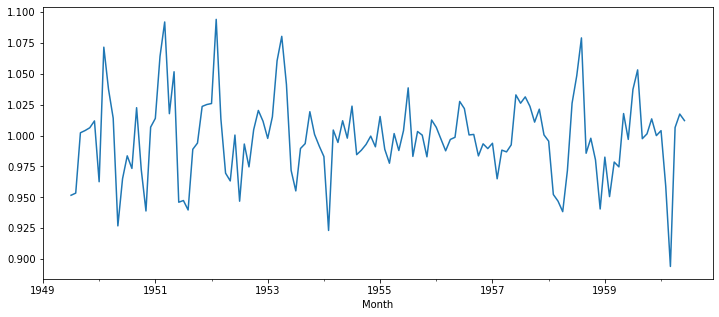

In [46]:
result.resid.plot()